<h2>Lending Club Analysis using EDA(Explanatory Data Analysis) and Python Visualization</h2>
<img style="text-align:centre" src="https://media.istockphoto.com/id/1145371340/photo/partner-has-made-a-fraud-in-the-contract-of-sale-and-being-handed-a-cash-and-pen-to-the.jpg?s=612x612&w=0&k=20&c=gEL2GiGxVAWIg6zd73afHWjVE37cNEBww49DE45jwiI="/>

## Table of Contents <a name="content0"/>
1. [Import necessary libraries & Set required parameters](#content1)
2. [Data Sourcing & Understanding](#content2)
3. [Data Cleaning](#content3)
4. [Derived Metrics](#content4)
5. [Univariate Analysis](#content5)
<br/>    5.1 [Univariate Analysis on Continuos Variables](#content5_1)
<br/>    5.2 [Univariate Analysis on Categorical Variables](#content5_2)
6. [Segmented Univariate Analysis](#content6)
<br/>    6.1 [Segmented Univariate Analysis on Continuos Variables](#content6_1)
<br/>    6.2 [Segmented Univariate Analysis on Categorical Variables](#content6_2)
7. [Bivariate Analysis](#content7)
<br/>    7.1 [Bivariate Analysis on Continuos Variables](#content7_1)
<br/>    7.2 [Bivariate Analysis on Continuos & Categorical Variables](#content7_2)
8. [Conclusion](#content8)

## 1. Import necessary libraries & Set required parameters <a name="content1"/>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import regex as re

#set it to round the float decimals to 2
pd.options.display.float_format = '{:.2f}'.format

#set it to display all the columns
pd.set_option('display.max_columns', 150)

[Back To Top🔝](#content0)
## 2. Data Sourcing & Understanding<a name="content2"/>

In [29]:
# to avoid low memory waring set dtype as object for now.
finance_data = pd.read_csv('loan.csv', dtype="object")

In [30]:
# check info
finance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


In [31]:
# check columns
finance_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [32]:
# check the data
finance_data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,

[Back To Top🔝](#content0)
## 3. Data Cleaning<a name="content3"/>

### Check the null value percentage for columns

In [33]:
data_size = finance_data.shape[0]
na_percent = (finance_data.isna().sum()/data_size)*100
print("NaN percent < 50 : ",(na_percent<50).sum())
print("NaN percent < 30 : ",(na_percent<30).sum())
print("NaN percent < 20 : ",(na_percent<30).sum())
print("NaN percent < 5 : ",(na_percent<5).sum())

NaN percent < 50 :  54
NaN percent < 30 :  53
NaN percent < 20 :  53
NaN percent < 5 :  52


### Remove the columns which have >=30% of null values as it will not effect our analysis

In [34]:
df = finance_data.drop(finance_data.columns[finance_data.apply(lambda col: ((col.isna().sum()/data_size)*100)>30)], axis=1)
df.shape

(39717, 53)

### Remove the columns which has only one value as it will not effect our analysis

In [35]:
for col in df.columns:
    if(df[col].value_counts().count()<=1):
        print(col)
        df.drop(col, axis=1, inplace=True)

pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
application_type
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens


### Check the rows which has more than 'n' null values and remove if necessary

In [36]:
for i in range(1,6):
    print("Rows with null values greater than",i,"is ",len(df[df.isna().sum(axis=1)>=i]))

Rows with null values greater than 1 is  3284
Rows with null values greater than 2 is  1071
Rows with null values greater than 3 is  10
Rows with null values greater than 4 is  0
Rows with null values greater than 5 is  0


### Remove the columns which are irrelevant to our target variable

In [37]:
useless_cols = ["id","member_id","url","zip_code", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "last_credit_pull_d"]
df.drop(columns=useless_cols, inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   loan_amnt             39717 non-null  object
 1   funded_amnt           39717 non-null  object
 2   funded_amnt_inv       39717 non-null  object
 3   term                  39717 non-null  object
 4   int_rate              39717 non-null  object
 5   installment           39717 non-null  object
 6   grade                 39717 non-null  object
 7   sub_grade             39717 non-null  object
 8   emp_title             37258 non-null  object
 9   emp_length            38642 non-null  object
 10  home_ownership        39717 non-null  object
 11  annual_inc            39717 non-null  object
 12  verification_status   39717 non-null  object
 13  issue_d               39717 non-null  object
 14  loan_status           39717 non-null  object
 15  purpose               39717 non-null

### Convert the interest rate column to type 'numeric'

In [39]:
p = re.compile(r'\d+(?:\.\+)?')
df["int_rate"] = df["int_rate"].apply(lambda x: p.findall(x)[0])
finance_data["int_rate"]

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

### Convert the revol_util column to type 'numeric'

In [40]:
df = df[~df["revol_util"].isna()]
df["revol_util"] = df["revol_util"].apply(lambda x: x.rstrip('%'))
df["revol_util"]

0        83.70
1         9.40
2        98.50
3           21
4        53.90
         ...  
39712    13.10
39713    26.90
39714    19.40
39715     0.70
39716    51.50
Name: revol_util, Length: 39667, dtype: object

In [41]:
df.shape

(39667, 31)

### Check the categories which has very less percentage(<1%) and remove them from columns:<br>home_ownership, verification_status, addr_state

In [42]:
#for comparing the percentage and removing columns
def useless_categories(col, limit):
    percent_list = ((df[col].value_counts()*100)/len(df))
    print("Before removing from "+col,percent_list, sep="\n")
    useless_list = percent_list[percent_list<limit]
    return df.drop(df[df[col].isin(useless_list.index)].index)

In [43]:
#removing useless categories for home_ownership
df = useless_categories("home_ownership", 1)

Before removing from home_ownership
RENT       47.56
MORTGAGE   44.49
OWN         7.70
OTHER       0.24
NONE        0.01
Name: home_ownership, dtype: float64


In [44]:
#removing useless categories for verification_status
df = useless_categories("verification_status", 1)

Before removing from verification_status
Not Verified      42.56
Verified          32.26
Source Verified   25.19
Name: verification_status, dtype: float64


In [45]:
#removing useless categories for addr_state
df = useless_categories("addr_state", 0.5)

Before removing from addr_state
CA   17.87
NY    9.61
FL    7.23
TX    6.87
NJ    4.66
IL    3.84
PA    3.82
VA    3.54
GA    3.52
MA    3.37
OH    3.08
MD    2.64
AZ    2.20
WA    2.12
CO    1.99
NC    1.99
CT    1.90
MI    1.81
MO    1.73
MN    1.55
NV    1.25
SC    1.19
WI    1.16
AL    1.14
OR    1.13
LA    1.10
KY    0.82
OK    0.76
KS    0.68
UT    0.65
AR    0.61
DC    0.53
RI    0.50
NM    0.48
WV    0.45
HI    0.44
NH    0.43
DE    0.29
MT    0.21
WY    0.21
AK    0.20
SD    0.16
VT    0.13
MS    0.05
TN    0.04
IN    0.02
ID    0.02
IA    0.01
NE    0.01
ME    0.01
Name: addr_state, dtype: float64


### Convert continuos variables type to 'numeric'

In [46]:
numeric_cols=["loan_amnt", "funded_amnt", "funded_amnt_inv", "int_rate", "installment", "annual_inc", "dti", "revol_util"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38123 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38123 non-null  int64  
 1   funded_amnt           38123 non-null  int64  
 2   funded_amnt_inv       38123 non-null  float64
 3   term                  38123 non-null  object 
 4   int_rate              38123 non-null  int64  
 5   installment           38123 non-null  float64
 6   grade                 38123 non-null  object 
 7   sub_grade             38123 non-null  object 
 8   emp_title             35774 non-null  object 
 9   emp_length            37098 non-null  object 
 10  home_ownership        38123 non-null  object 
 11  annual_inc            38123 non-null  float64
 12  verification_status   38123 non-null  object 
 13  issue_d               38123 non-null  object 
 14  loan_status           38123 non-null  object 
 15  purpose            

[Back To Top🔝](#content0)
## 4. Derived Metrics<a name="content4"/>

<p style='font-size:16px;'><b>1. Create a new boolean column 'defaulted' from loan_status</b> this is done so that we treat the entire data into 2 categories ( Defaulted and not Defaulted)</p>
<p style='font-size:16px'>&emsp;a. Removing rows with value 'Current' from loan_status as it is not required for new column 'defaulted'
<br/>&emsp;b. Removing 'loan_status' after creating 'defaulted' column</p>

In [47]:
df["loan_status"].value_counts()

Fully Paid     31625
Charged Off     5397
Current         1101
Name: loan_status, dtype: int64

In [48]:
df = df[df["loan_status"]!="Current"]
df["defaulted"] = df["loan_status"].apply(lambda x: False if x=="Fully Paid" else True)
df.drop(columns=['loan_status'], inplace=True)
df["defaulted"].value_counts()

False    31625
True      5397
Name: defaulted, dtype: int64

<p style='font-size:16px'><b>2. Create new columns 'issue_month', 'issue_year' from 'issue_d' </b> this is done so that we can base our analysis on Months and Years and also converting them to ordered Categorical variables

In [49]:
df["issue_month"], df["issue_year"] = zip(*df["issue_d"].str.split('-'))
# sorting 'issue_month' with categorical sorting
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['issue_month'] = pd.Categorical(df['issue_month'],categories=order, ordered=True)
# adding century prefix to issue year
df["issue_year"] = df["issue_year"].apply(lambda x: pd.to_numeric("20"+x) if int(x) < 24 else pd.to_numeric("19"+x))

In [50]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,revol_util,issue_year
count,37022.00,37022.00,37022.00,37022.00,37022.00,37022.00,37022.00,37022.00,37022.00
mean,11080.17,10817.21,10265.17,11.36,323.38,68961.52,13.26,48.71,2010.32
std,7354.99,7096.39,7026.06,3.73,208.88,61826.89,6.68,28.37,0.87
min,500.00,500.00,0.00,5.00,15.69,4000.00,0.00,0.00,2007.00
25%,5400.00,5206.25,5000.00,8.00,166.05,40320.00,8.10,25.20,2010.00
50%,9800.00,9600.00,8800.00,11.00,278.56,59000.00,13.33,49.10,2011.00
75%,15000.00,15000.00,14050.00,14.00,426.47,82303.75,18.54,72.30,2011.00
max,35000.00,35000.00,35000.00,24.00,1305.19,6000000.00,29.99,99.90,2011.00


<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>For annual_inc, the max value is 100 times mean which implies that there are outliers</p>
</div>

<p style='font-size:16px'><b>3. Remove the outliers in annual_inc without effecting the overall data</b></p>

234912.84000000035

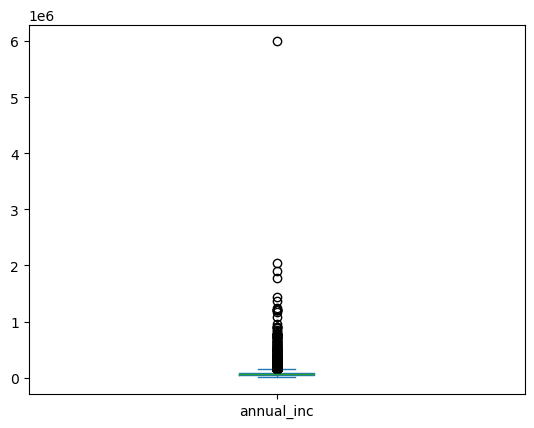

In [51]:
df['annual_inc'].plot(kind="box")
df['annual_inc'].quantile(0.99)

In [52]:
df.drop(df[df["annual_inc"] > df['annual_inc'].quantile(0.99)].index, inplace=True)
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,revol_util,issue_year
count,36651.00,36651.00,36651.00,36651.00,36651.00,36651.00,36651.00,36651.00,36651.00
mean,10994.09,10735.07,10187.48,11.34,320.82,65563.37,13.32,48.70,2010.32
std,7271.11,7015.48,6944.84,3.72,206.16,35291.18,6.66,28.34,0.87
min,500.00,500.00,0.00,5.00,15.69,4000.00,0.00,0.00,2007.00
25%,5300.00,5200.00,5000.00,8.00,165.74,40000.00,8.19,25.25,2010.00
50%,9600.00,9500.00,8725.00,11.00,277.00,58100.00,13.40,49.10,2011.00
75%,15000.00,15000.00,14000.00,14.00,423.11,81000.00,18.59,72.20,2011.00
max,35000.00,35000.00,35000.00,24.00,1305.19,234600.00,29.99,99.90,2011.00


#### We can create bins from min to max with quantiles as ranges and create some categorical variables from continuos variables
in the code below we have created 2 variables which is then used to segment  the dataframe into bins<br/>
<b>bins:</b>  this variable is a list of min,25%,50%,75%,max<br/>
<b>slots:</b> this is the list of names for each bins


<p style='font-size:16px'><b>4. Create bins with range for loan amount</p>

In [53]:
bins = [500, 5300, 9600, 15000, 40000]
slots = ['500-5300', '5300-9600', '9600-15000', '15000 and above']
df['loan_amnt_range'] = pd.cut(df['loan_amnt'], bins, labels=slots)

<p style='font-size:16px'><b>5. Create bins with range for int_rate</p>

In [54]:
bins = [5, 8, 11, 14, 30]
slots = ['5-8', '8-11', '11-14', '14 and above']
df['int_rate_range'] = pd.cut(df['int_rate'], bins, labels=slots)

<p style='font-size:16px'><b>6. Create bins with range for annual_inc</p>

In [55]:
bins = [4000, 40000, 58000, 81000, 250000]
slots = ['4000-40000', '40000-58000', '58000-81000', '81000 and above']
df['annual_inc_range'] = pd.cut(df['annual_inc'], bins, labels=slots)

<p style='font-size:16px'><b>7. Create bins with range for dti</p>

In [56]:
bins = [0, 8, 13, 19, 30]
slots = ['0-8', '8-13', '13-19', '19 and above']
df['dti_range'] = pd.cut(df['dti'], bins, labels=slots)

<p style='font-size:16px'><b>8. Create bins with range for revol_util</p>

In [57]:
bins = [0, 25, 49, 72, 100]
slots = ['0-25', '25-49', '49-72', '72 and above']
df['revol_util_range'] = pd.cut(df['revol_util'], bins, labels=slots)

[Back To Top🔝](#content0)
## 5. Univariate Analysis<a name="content5"/>

### 5.1 Univariate Analysis on Continuos Variables<a name="content5_1"/>

In [58]:
df.pivot_table(index="defaulted", aggfunc=['median'])

/var/folders/f6/9byzh4hn6kl0c63x57qvk1qw0000gn/T/ipykernel_15994/4194547598.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(index="defaulted", aggfunc=['median'])


median                                                         \
          annual_inc   dti funded_amnt funded_amnt_inv installment int_rate   
defaulted                                                                     
False       60000.00 13.23        9200         8500.00      274.81       11   
True        52800.00 14.33       10000         9400.00      291.76       13   

                                           
          issue_year loan_amnt revol_util  
defaulted                                  
False           2011      9600      47.55  
True            2011     10000      58.40

### Loan amount

<Axes: >

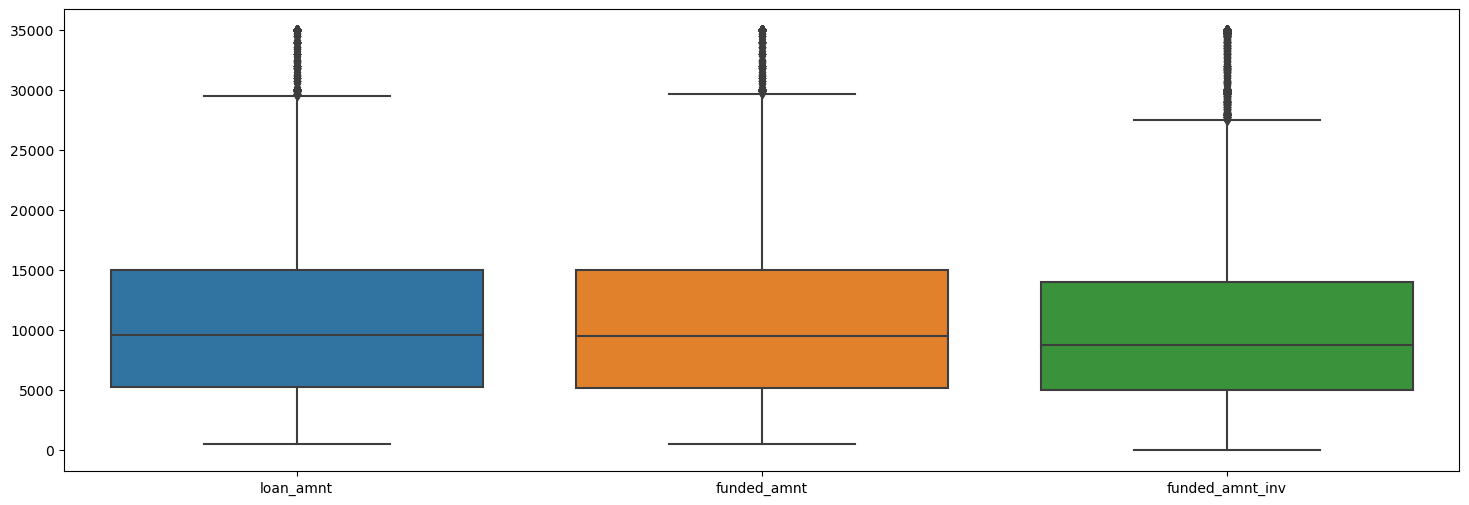

In [59]:
#Univariate Analysis on Loan amount
fig, ax = plt.subplots(figsize=(18, 6))
sb.boxplot(data=df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']])

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>Most of the customers are taking loan between 6000 & 15000</p>
</div>

### Interest Rate

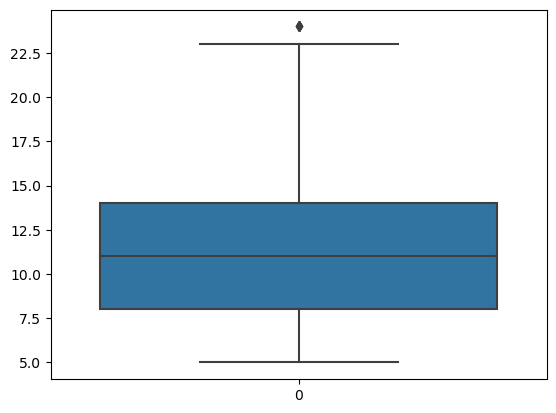

In [60]:
#Univariate Analysis on Interest rate
fig = sb.boxplot(data=df['int_rate'])

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>Most of the interest rates are from 8.75% to 14%</p>
</div>

### Annual Income

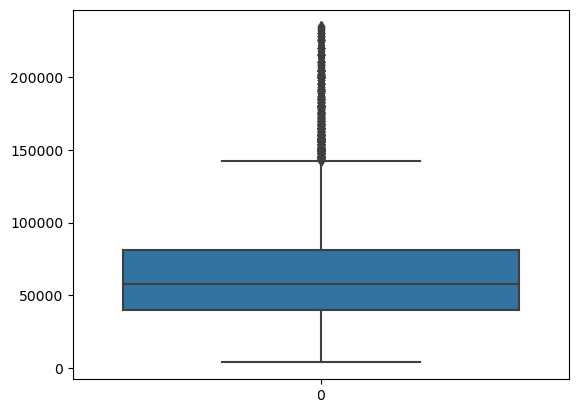

In [61]:
fig = sb.boxplot(data=df['annual_inc'])

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>Most of the customers have annual income from Rs 40,000 to Rs 80,000</p>
</div>

### Revolving utilization rate

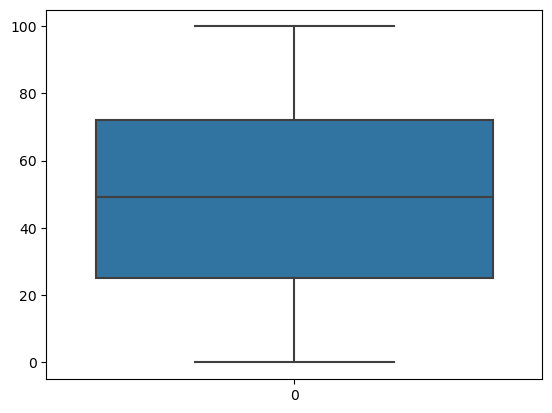

In [62]:
fig = sb.boxplot(data=df['revol_util'])

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>Most of the customers are using 25% to 75% of their revolving credit</p>
</div>

### Debt to income rate

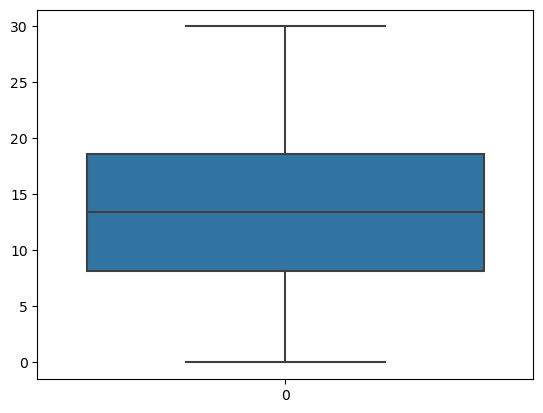

In [63]:
fig = sb.boxplot(data=df['dti'])

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>Most of the customers have debt-to-income ratio in range [ 8-18 ]</p>
</div>

[Back To Top🔝](#content0)
### 5.2 Univariate Analysis on Categorical Variables<a name="content5_2"/>

In [64]:
#Function to do some common operations in Univariate
def percentage_total_bar(ax, show_both=False):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    total = nested_sum(all_heights)
    for bars in ax.containers:
        for i, p in enumerate(bars):
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            if(show_both):
                sub_total = sum(xgroup[i] for xgroup in all_heights)
                sub_percent = f'{(100 * p.get_height() / sub_total) :.1f}%'
                ax.annotate(sub_percent, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')
                ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()/2), size=11, ha='center', va='top', color='white')
            else:
                ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')
def nested_sum(listt):
    return sum(nested_sum(x) if isinstance(x, list) else x for x in listt )
def plot_value_count(data, col, size):
    fig, ax = plt.subplots(figsize=size)
    ax = data[col].value_counts().plot(kind="bar")
    percentage_total_bar(ax)

### Term

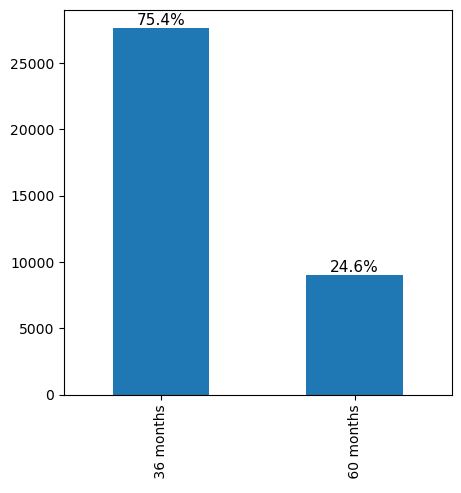

In [65]:
#Univariate Analysis with term
plot_value_count(df, 'term', (5,5))

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>75% of the customers are taking loan for 36 months</p>
</div>

### Grade

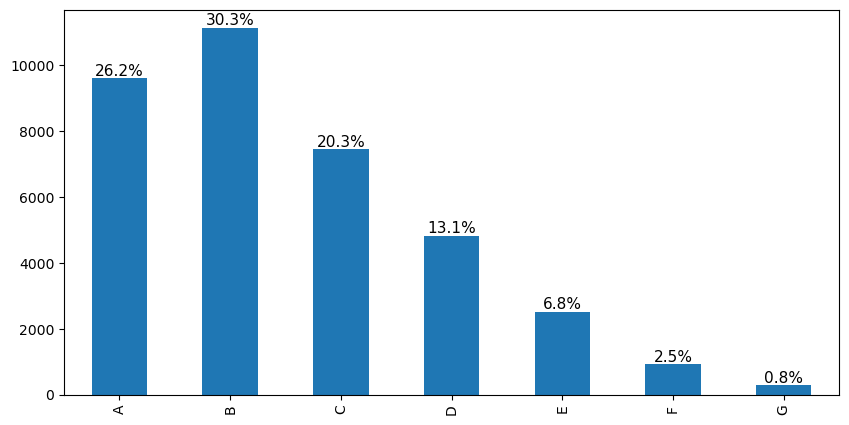

In [66]:
#Univariate Analysis with grade
order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
df_grades = pd.Categorical(df['grade'],categories=order, ordered=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax = df_grades.value_counts().plot(kind="bar")
percentage_total_bar(ax)

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>30% customers are from grade B.<br/>We can also see that customers are decreasing as we move from B to G</p>
</div>

### Employee length

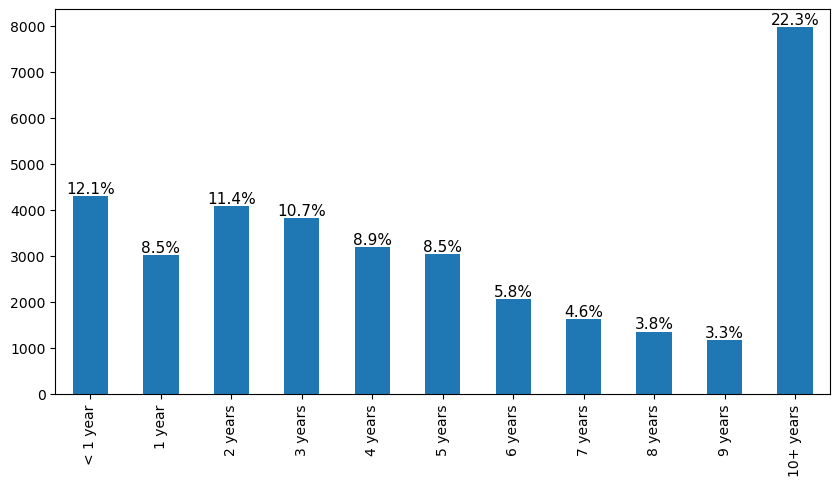

In [67]:
#Univariate Analysis with emp_length
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
df_emp_length  = pd.Categorical(df['emp_length'],categories=order, ordered=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax = df_emp_length.value_counts().plot(kind="bar")
percentage_total_bar(ax)

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>22% of customers who applied for loan has 10+ years experience
        <br/>12% customers have applied for loan who has less than 1 year experience or self employed.</p>
</div>

### Home Ownership

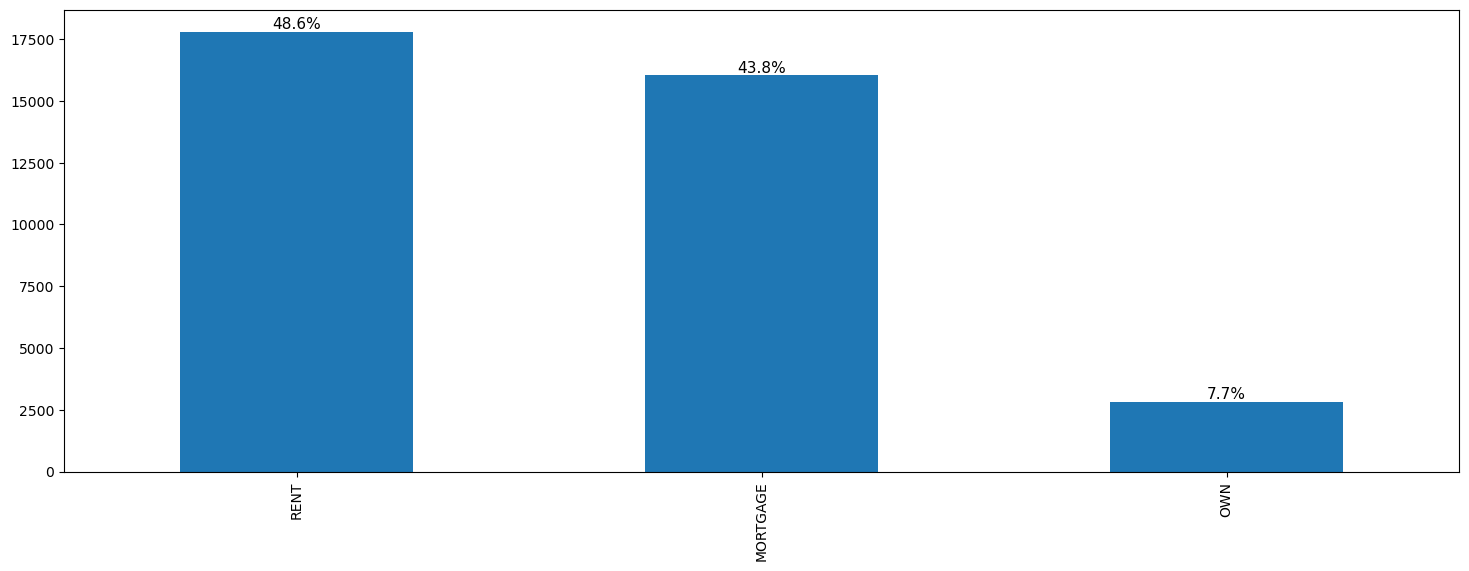

In [68]:
#Univariate Analysis with Home ownership
plot_value_count(df, 'home_ownership', (18, 6))

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>Around 48.6% of the total customers are living for <b>rent</b> whereas 43.8% have <b>mortaged</b> their home
    </p>
</div>

### Verification Status

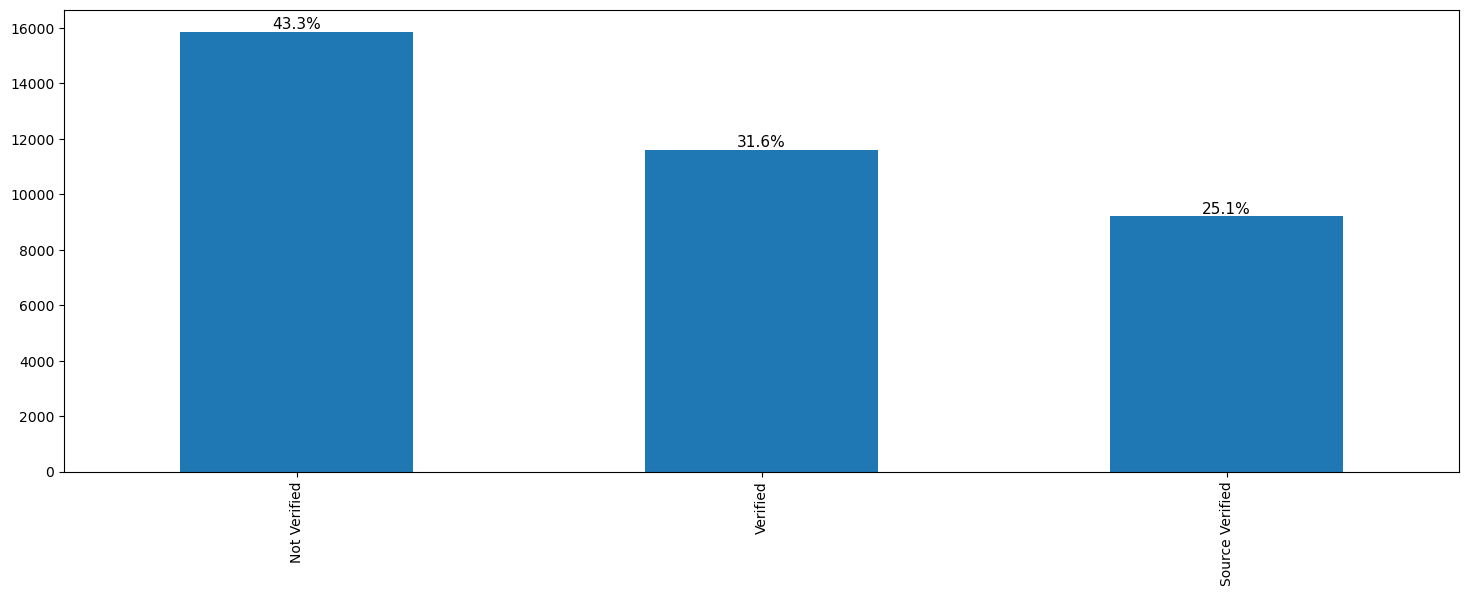

In [69]:
#Univariate Analysis with Verification Status
plot_value_count(df, 'verification_status', (18, 6))

<p style="background-color:#04AF70;font-size:16px;padding:10px;color:white;">Insights:<br/>Only 56% of customers are verified by record (verified+source_verifed) </p>    

### Address State 

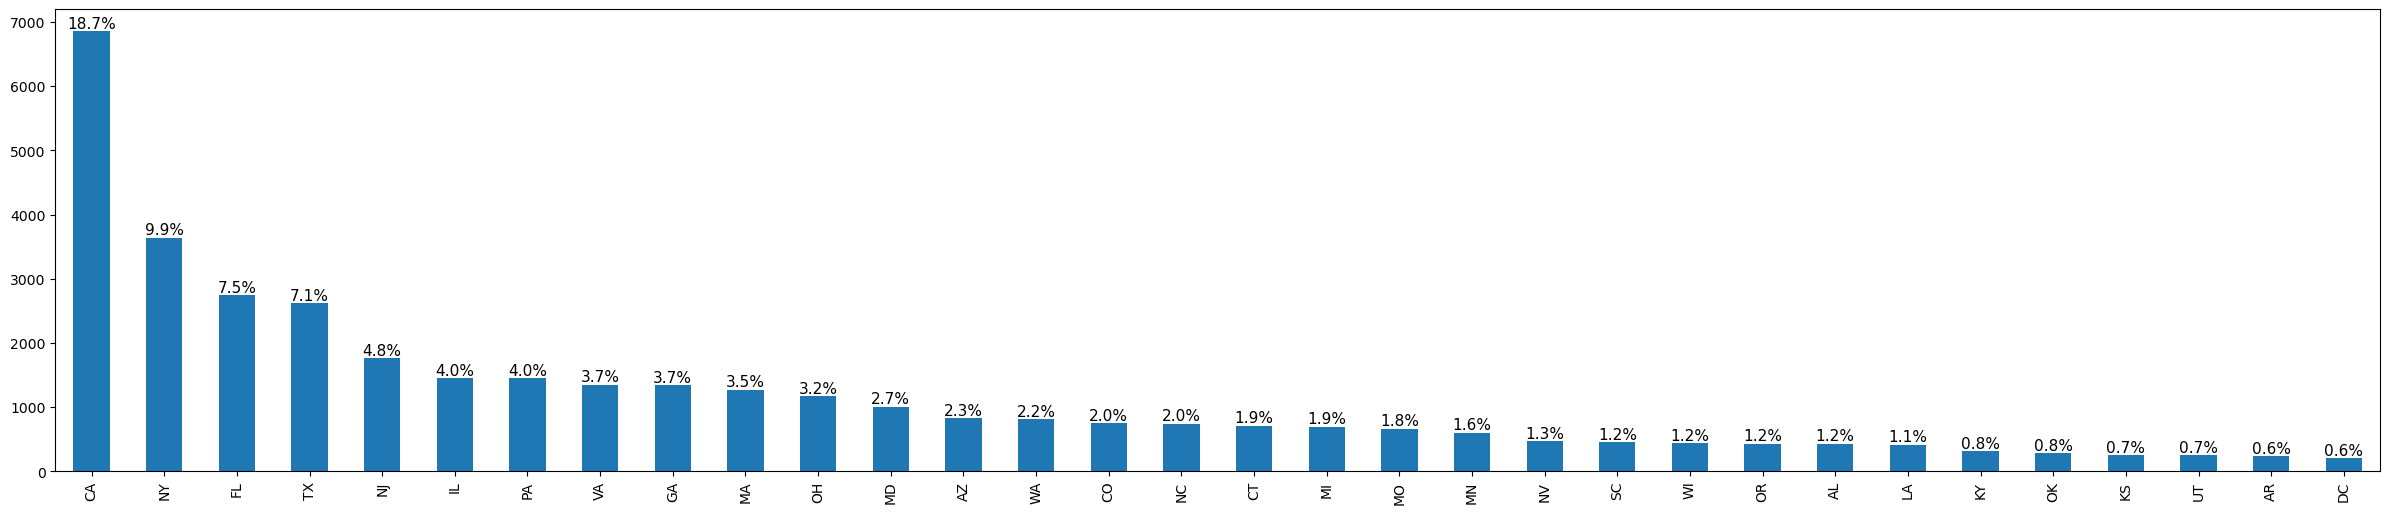

In [70]:
#Univariate Analysis with Address State
plot_value_count(df, 'addr_state', (30, 6))

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>Most of the customers are taking loan from most developed states like Calfornia, New York, Florida </p>
</div>

### Issue Year

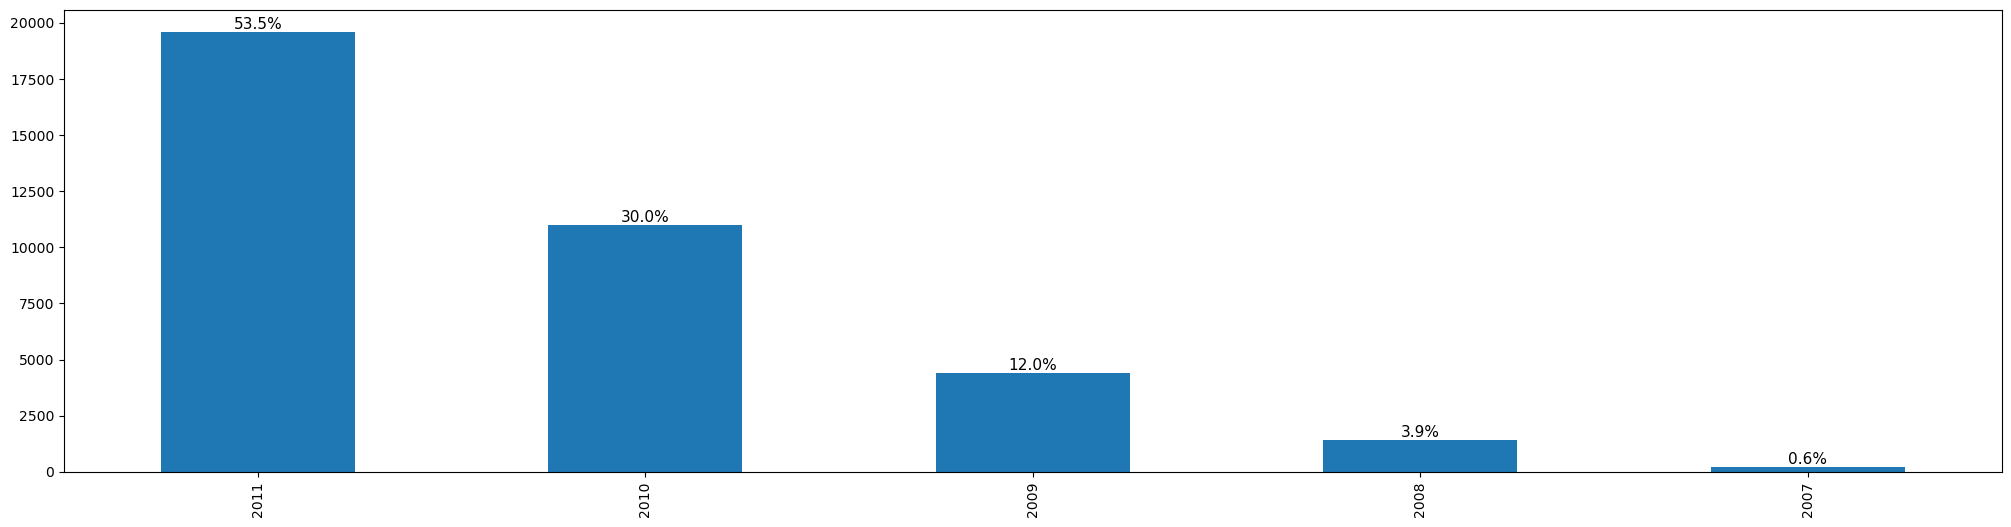

In [71]:
#Univariate Analysis with Issue Year
plot_value_count(df, 'issue_year', (25, 6))

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>We can see that more than 50% of the total customers have taken loan in 2011
</div>

### Purpose

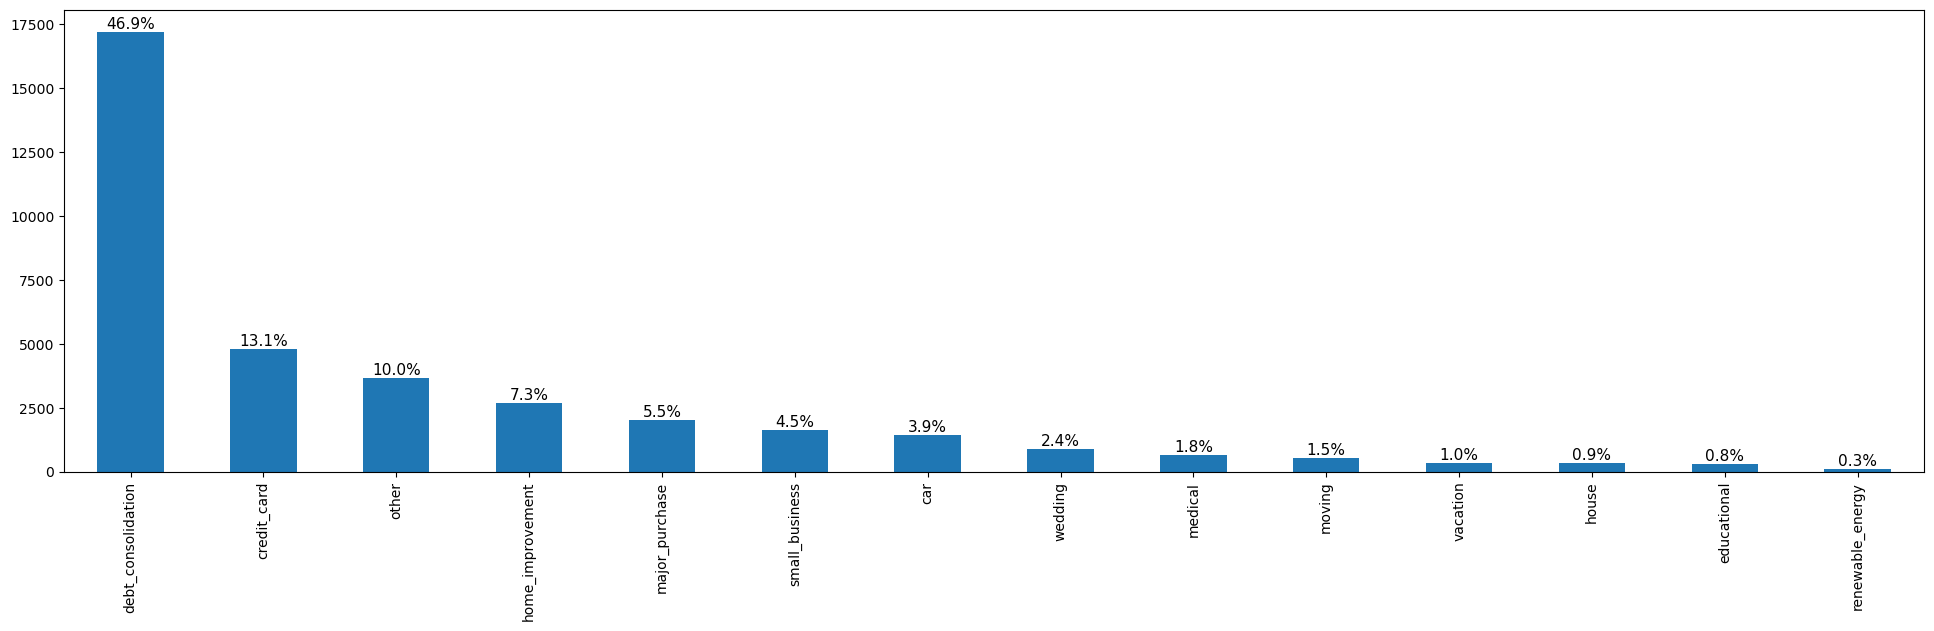

In [72]:
#Univariate Analysis with purpose
plot_value_count(df, 'purpose', (24,6))

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>Around 47% of the customers have applied loan for debt_consolidation only
</div>

[Back To Top🔝](#content0)
## 6. Segmented Univariate Analysis<a name="content6"/>

In [73]:
#more common functions for univariate analysis
def percentage_bar(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')
def bin_plot(df, col, hue):
    ax = df.pivot_table(columns=hue,values=col,index=col+'_range',aggfunc='size',fill_value=0).plot(kind='bar')
    percentage_bar(ax)
def plot_count(data, col, hue, size, show_both):
    fig, ax = plt.subplots(figsize=size)
    ax = sb.countplot(data = data, x = col, order = data[col].value_counts().index, hue = hue)
    percentage_total_bar(ax, show_both)

### 6.1 Segmented Univariate Analysis on Continuos Variables<a name="content6_1"/>

### Loan amount & Defaulted

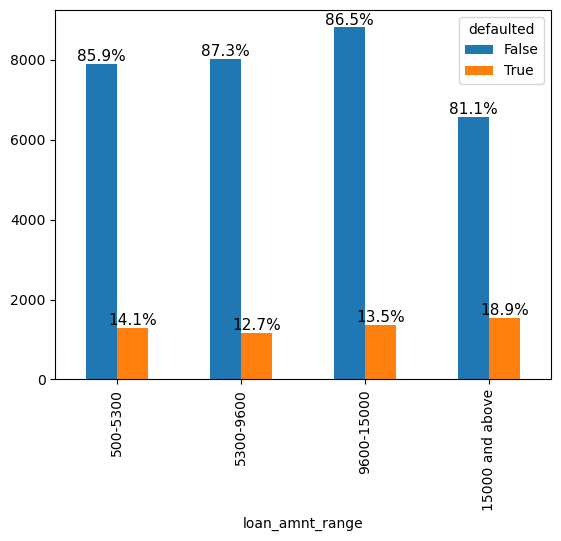

In [74]:
#Segmented Univariate Analysis with loan_amnt & defaulted
bin_plot(df, 'loan_amnt', 'defaulted')

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>Default rate is decreased till Rs 9600 and then it increased as the loan amount increased for customers</p>
</div>

### Interest Rate & Defaulted

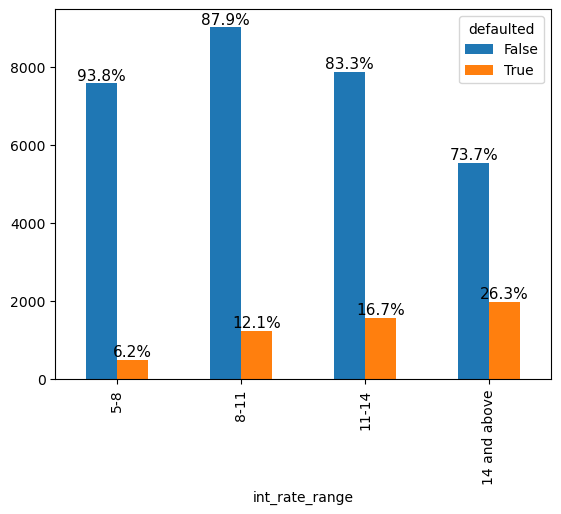

In [75]:
#Segmented Univariate Analysis with int_rate & defaulted
bin_plot(df, 'int_rate', 'defaulted')

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>Default rate is increased as we increase interest rate</p>
</div>

### Revolving utilization limit & Defaulted

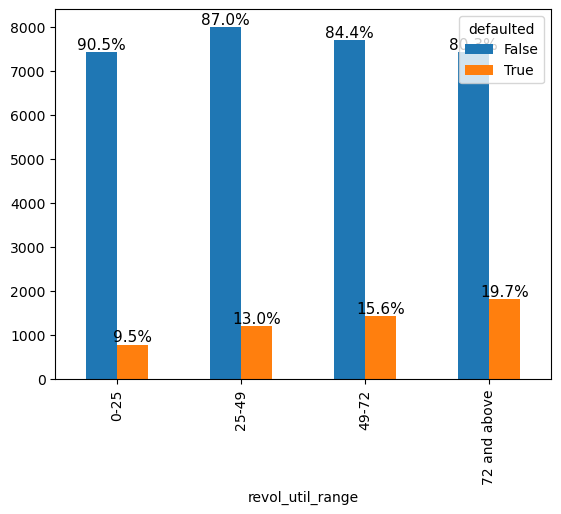

In [76]:
#Segmented Univariate Analysis with revol_util & defaulted
bin_plot(df, 'revol_util', 'defaulted')

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>Default rate is increased as we increase revolving utilization limit</p>
</div>

### Annual Income & Defaulted

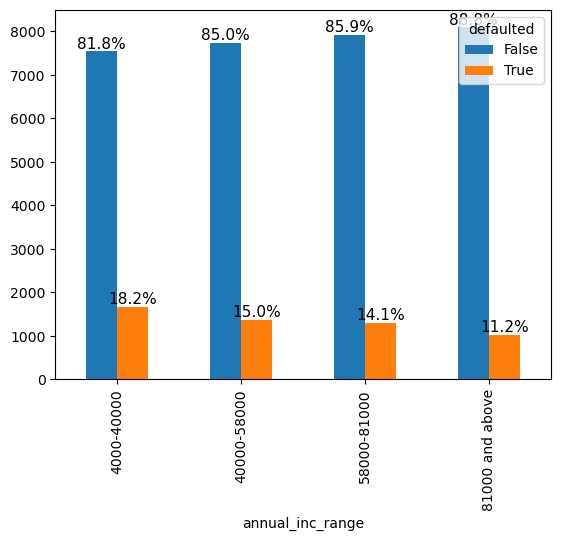

In [77]:
#Segmented Univariate Analysis with annual income & defaulted
bin_plot(df, 'annual_inc', 'defaulted')

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>Default rate is decreasing from customers with less annual income to more annual income 
        <br/> defaulted <label style="font-size:25px">&#8733;</label> 1/annual_income</p>
</div>

### Debt to income rate & Defaulted

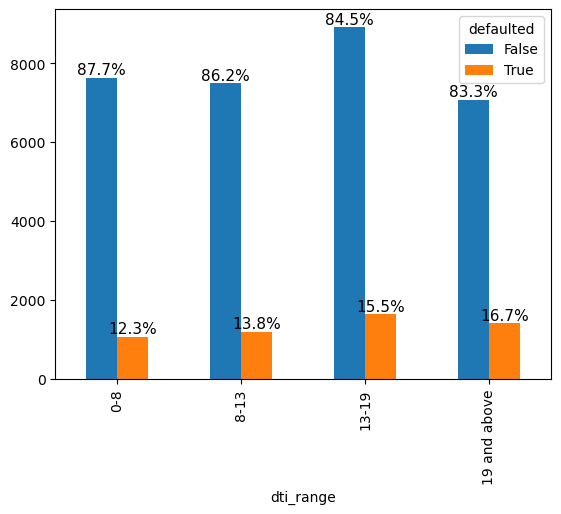

In [78]:
#Segmented Univariate Analysis with dti & defaulted
bin_plot(df, 'dti', 'defaulted')

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>Default rate is increased as the debt to income ratio is more for customers
    <br/> defaulted <label style="font-size:25px">&#8733;</label> dti</p>
</div>

[Back To Top🔝](#content0)
### 6.2 Segmented Univariate Analysis on Categorical Variables<a name="content6_2"/>

### Term & Defaulted

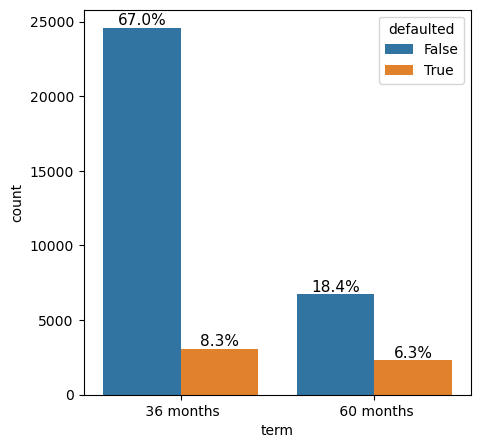

In [79]:
#Segmented Univariate Analysis with term & defaulted
plot_count(df, 'term', 'defaulted', (5, 5), False)

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>Default rate is more in 60 months and we can say that default rate increases as we increase term</p>
</div>

### Grade & Defaulted

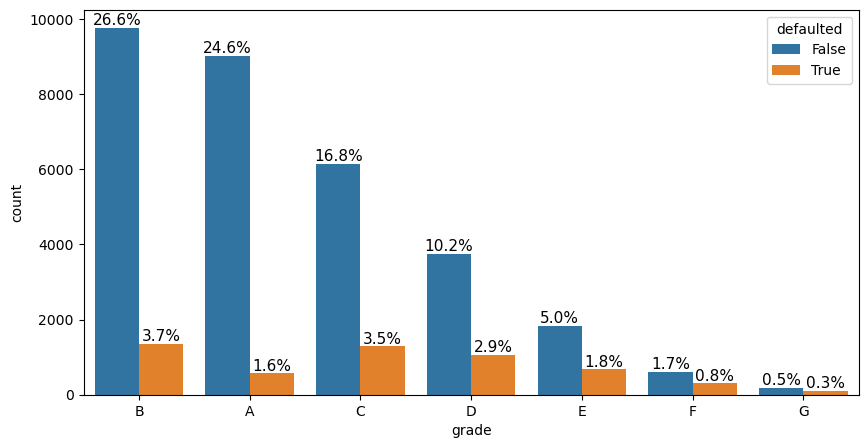

In [80]:
#Segmented Univariate Analysis with grade & defaulted
df_grades = df.sort_values(['grade'])
# df_grades['grade'].value_counts()
plot_count(df_grades, 'grade', 'defaulted', (10, 5), False)

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>Default rate is increasing from Grade A to G</p>
</div>

### Employee length & Defaulted

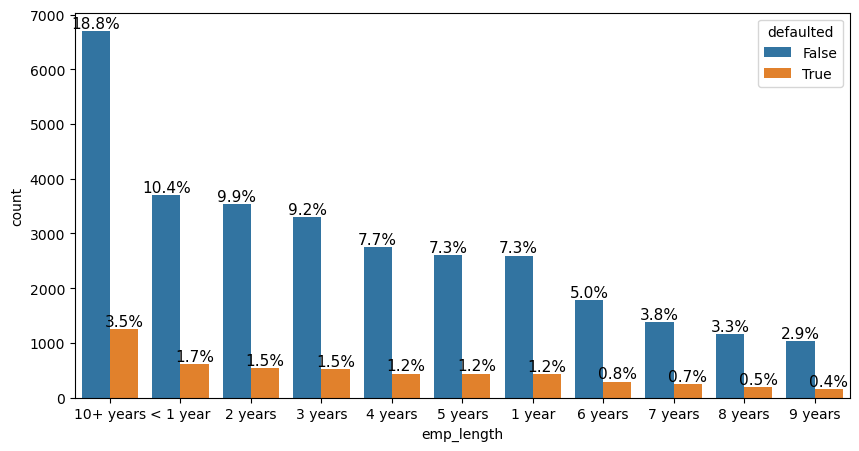

In [81]:
#Segmented Univariate Analysis with emp_length & defaulted
plot_count(df, 'emp_length', 'defaulted', (10, 5), False)

<div class="observation" style='background-color:#DE3163;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>Default rate is more for customers who has less than 1 year experience or self employed.
        <br/>Default rate also increases and decrease as emp_length increases</p>
</div>

### Home Ownership & Defaulted

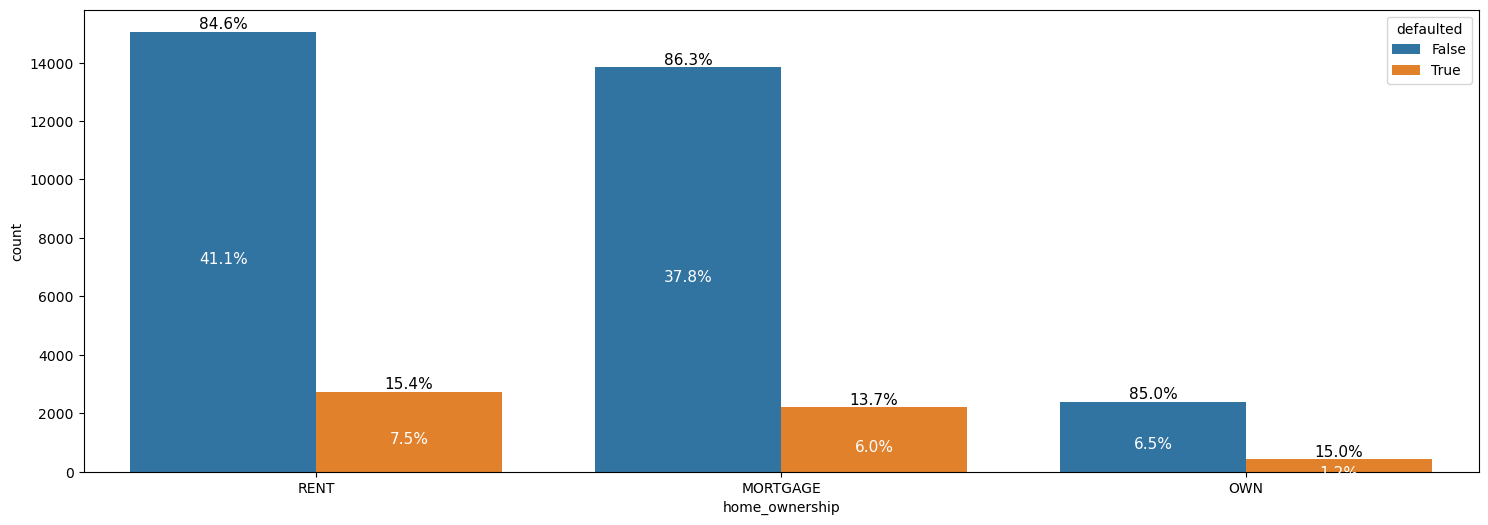

In [82]:
#Segmented Univariate Analysis with Home ownership & defaulted
plot_count(df, 'home_ownership', 'defaulted', (18, 6), True)

<div class="observation" style='background-color:#DE3163;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>Around 48.6% of the total customers are living for <b>rent</b> whereas 43.8% have <b>mortaged</b> their home
        <br/>Default rate is similar in all types of ownership
    </p>
</div>

### Verification Status & Defaulted

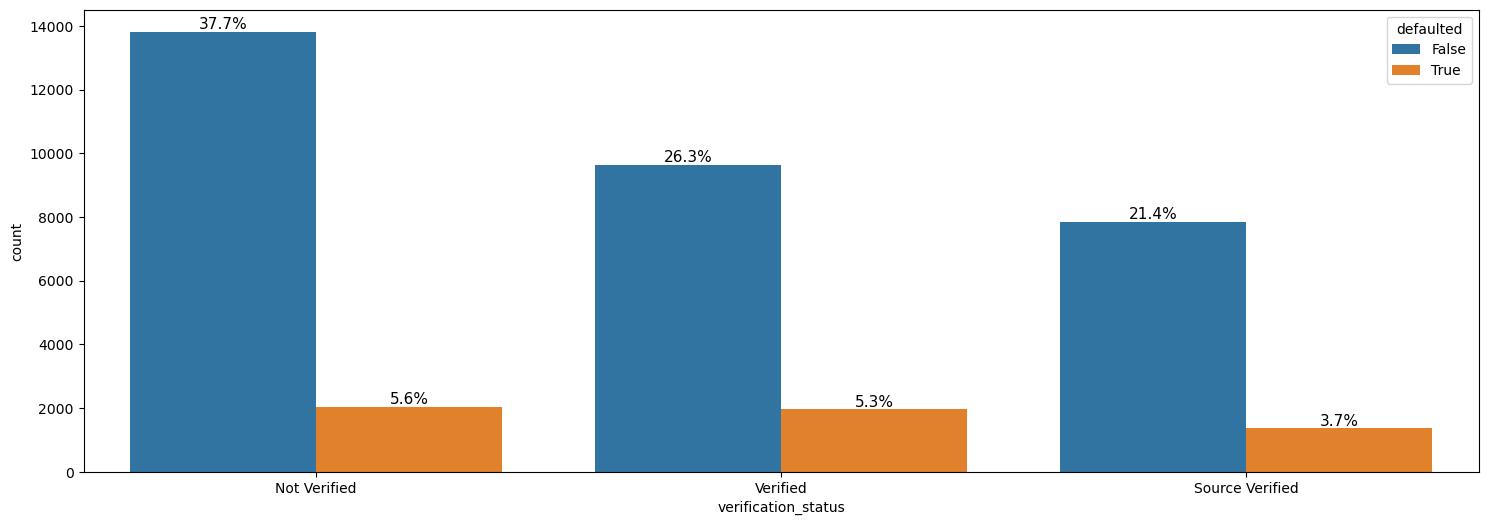

In [83]:
#Segmented Univariate Analysis with Verification Status & defaulted
plot_count(df, 'verification_status', 'defaulted', (18, 6), False)

<p style="background-color:#DE3163;font-size:16px;padding:10px;color:white;">Insights:<br/>Default rate is more for applicants who are verified and less for not verified</p>    

### Address State & Defaulted

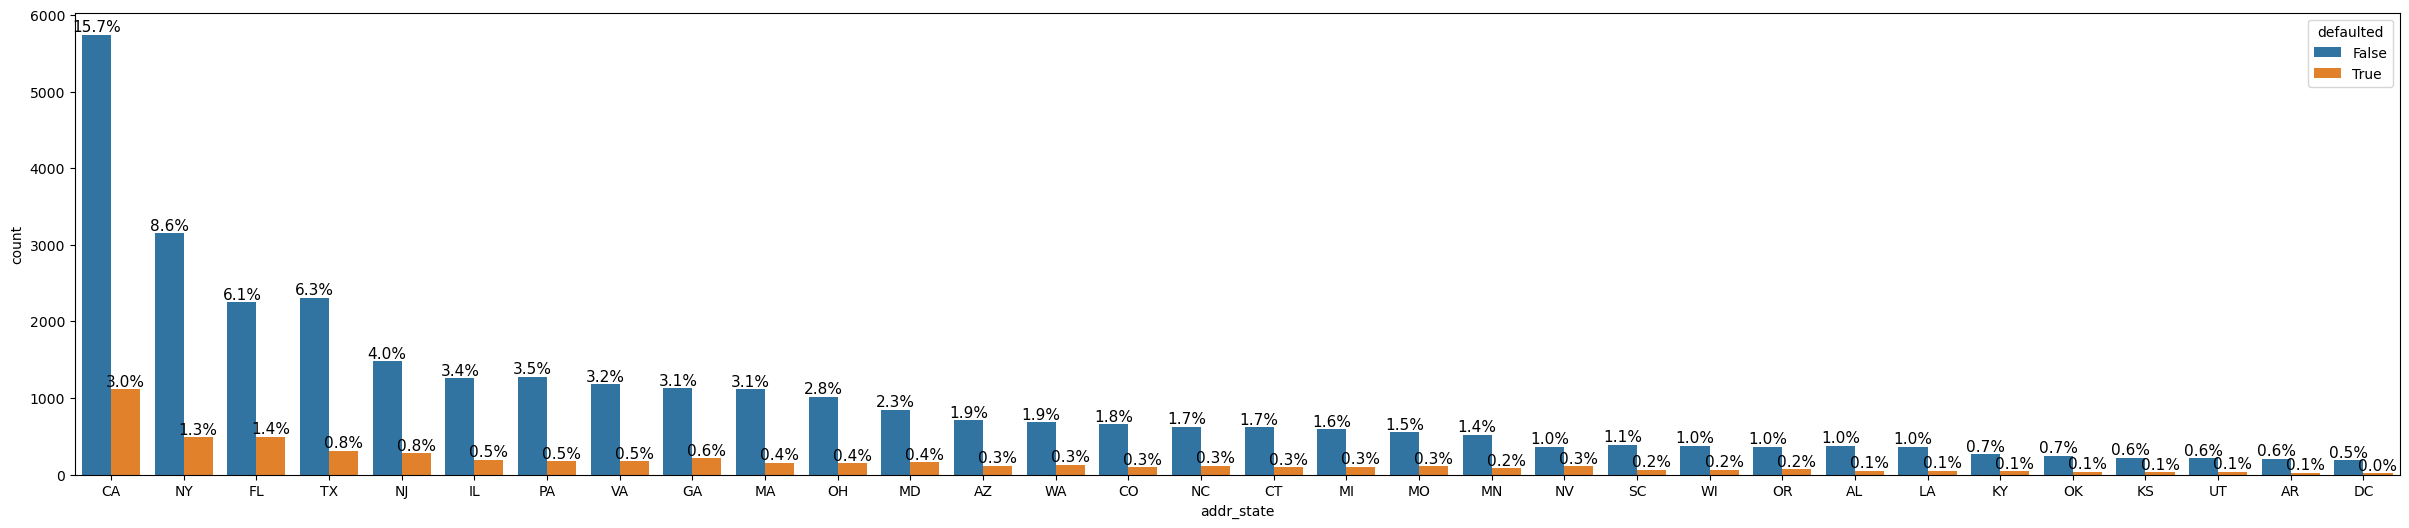

In [84]:
#Segmented Univariate Analysis with Address State & defaulted
plot_count(df, 'addr_state', 'defaulted', (30, 6), False)

<div class="observation" style='background-color:#DE3163;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>Florida has the highest default rate compared to other states
    <br/>No dependency with default rate</p>
</div>

### Issue Year & Defaulted

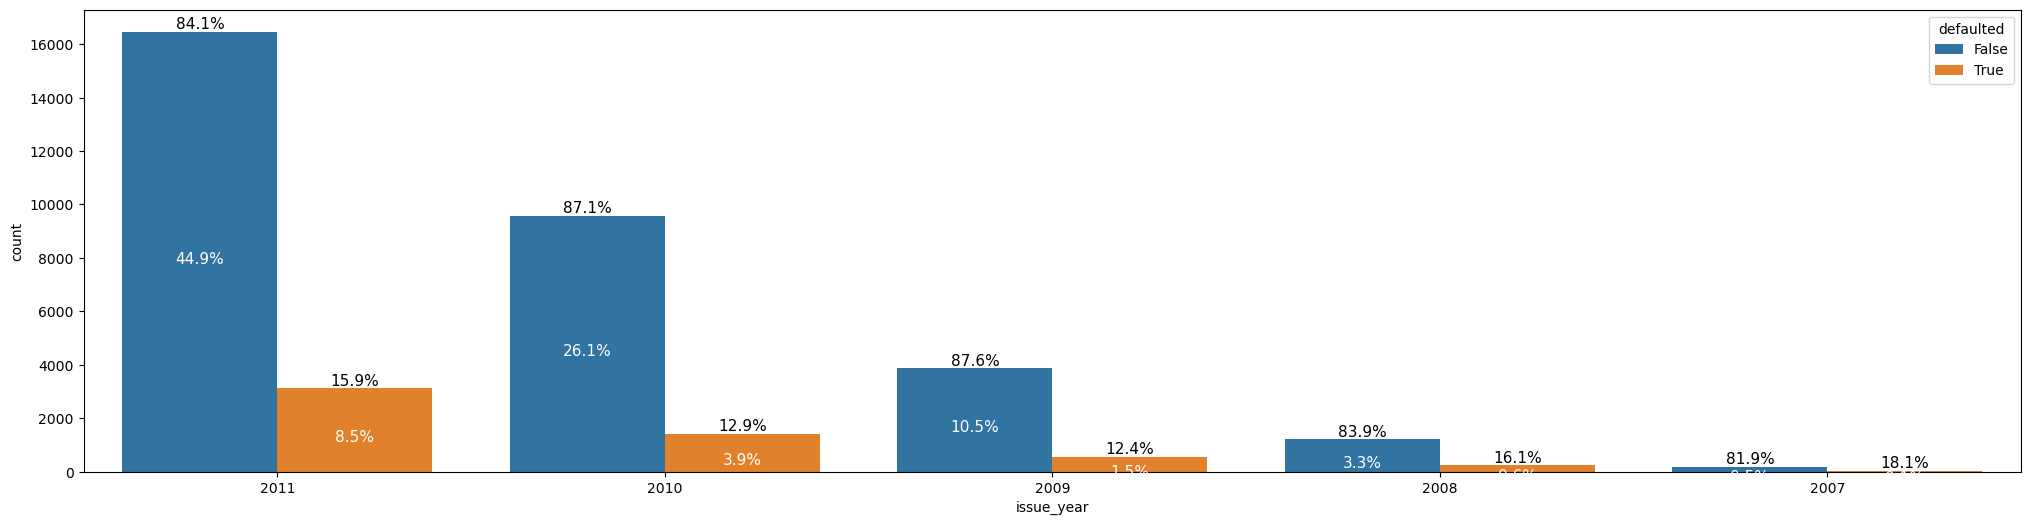

In [85]:
#Segmented Univariate Analysis with Issue Year & defaulted
plot_count(df, 'issue_year', 'defaulted', (25, 6), True)

<div class="observation" style='background-color:#DE3163;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>We can see that more than 50% of the total customers have taken loan in 2011
    <br/>We cannot find how this effects default rate as there is very less data for other years</p>
</div>

### Purpose & Defaulted

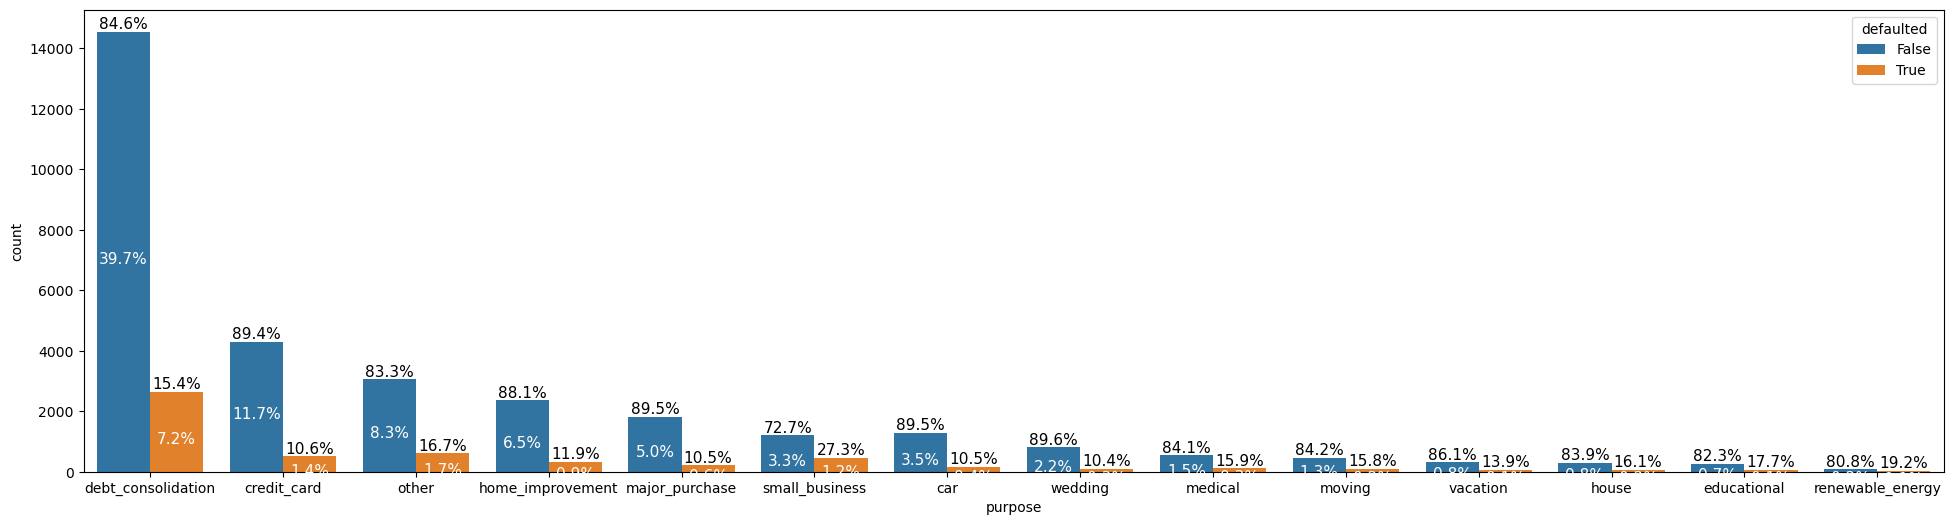

In [86]:
#Segmented Univariate Analysis with purpose & defaulted
fig, ax = plt.subplots(figsize=(24, 6))
ax = sb.countplot(data = df, x = 'purpose', order = df['purpose'].value_counts().index, hue = "defaulted") 
percentage_total_bar(ax, True)

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>Default rate is highest in small business
    <br/>Default rate is also high in house, educational & renewable energy but it has data <1%. So it <b>might</b> effect the defaut rate</p>
</div>

[Back To Top🔝](#content0)
## 7. Bivariate Analysis<a name="content7"/>

### 7.1 Bivariate Analysis on Continuos Variables<a name="content7_1"/>

In [87]:
df_corr = df[["loan_amnt", "funded_amnt", "funded_amnt_inv", "int_rate", "installment", "annual_inc", "dti", "revol_util"]]
df_corr = df_corr.corr()
df_corr

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,revol_util
loan_amnt,1.00,0.98,0.94,0.30,0.93,0.42,0.07,0.06
funded_amnt,0.98,1.00,0.96,0.30,0.96,0.41,0.07,0.07
funded_amnt_inv,0.94,0.96,1.00,0.29,0.91,0.39,0.08,0.07
int_rate,0.30,0.30,0.29,1.00,0.28,0.07,0.11,0.46
installment,0.93,0.96,0.91,0.28,1.00,0.41,0.06,0.10
annual_inc,0.42,0.41,0.39,0.07,0.41,1.00,-0.11,0.04
dti,0.07,0.07,0.08,0.11,0.06,-0.11,1.00,0.28
revol_util,0.06,0.07,0.07,0.46,0.10,0.04,0.28,1.00


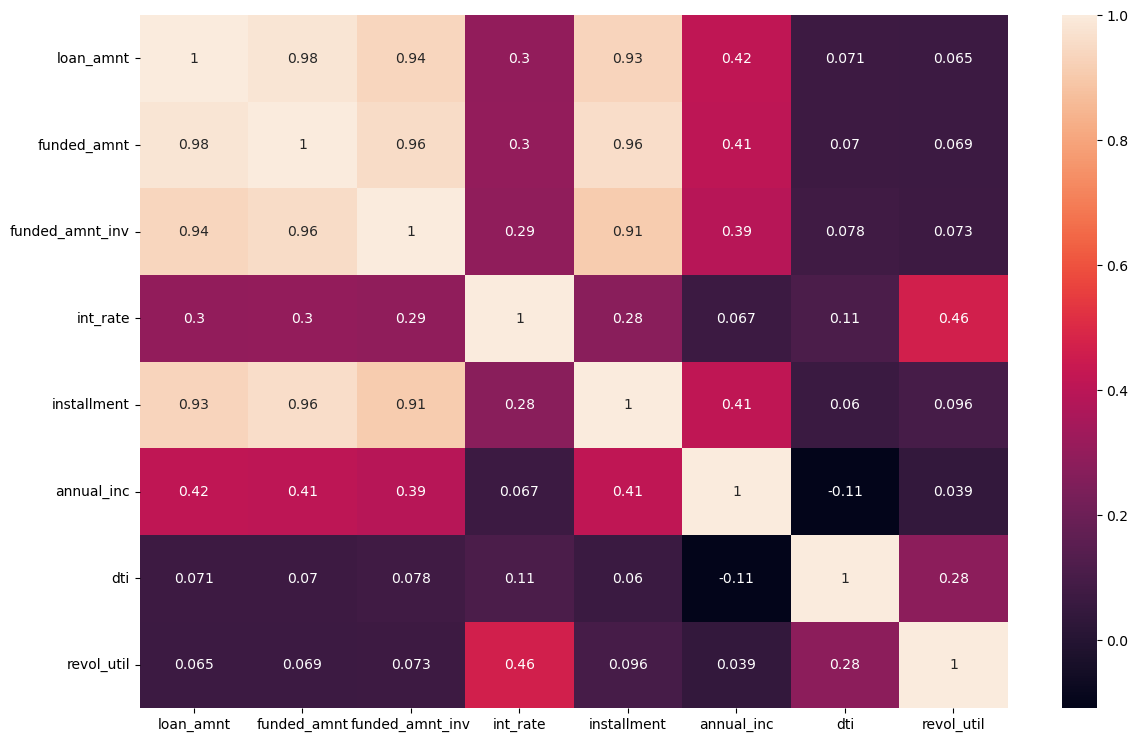

In [88]:
f, ax = plt.subplots(figsize=(14, 9))
sb.heatmap(df_corr, 
            xticklabels=df_corr.columns.values,
            yticklabels=df_corr.columns.values,annot= True)
plt.show()

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>Here, we can clearly observe the following points
<br/>1)<b>Loan amount</b> is highly correlated with funded amount, funded amount investment & installment.
<br/>2)<b>Interest rate, Revolving utilzation rate</b> are positively correlated to all when compared to other continuos variables</p>
</div>

[Back To Top🔝](#content0)
### 7.2 Bivariate Analysis on Continuos & Categorical Variables<a name="content7_2"/>

### Loan amount and Annual Income Range

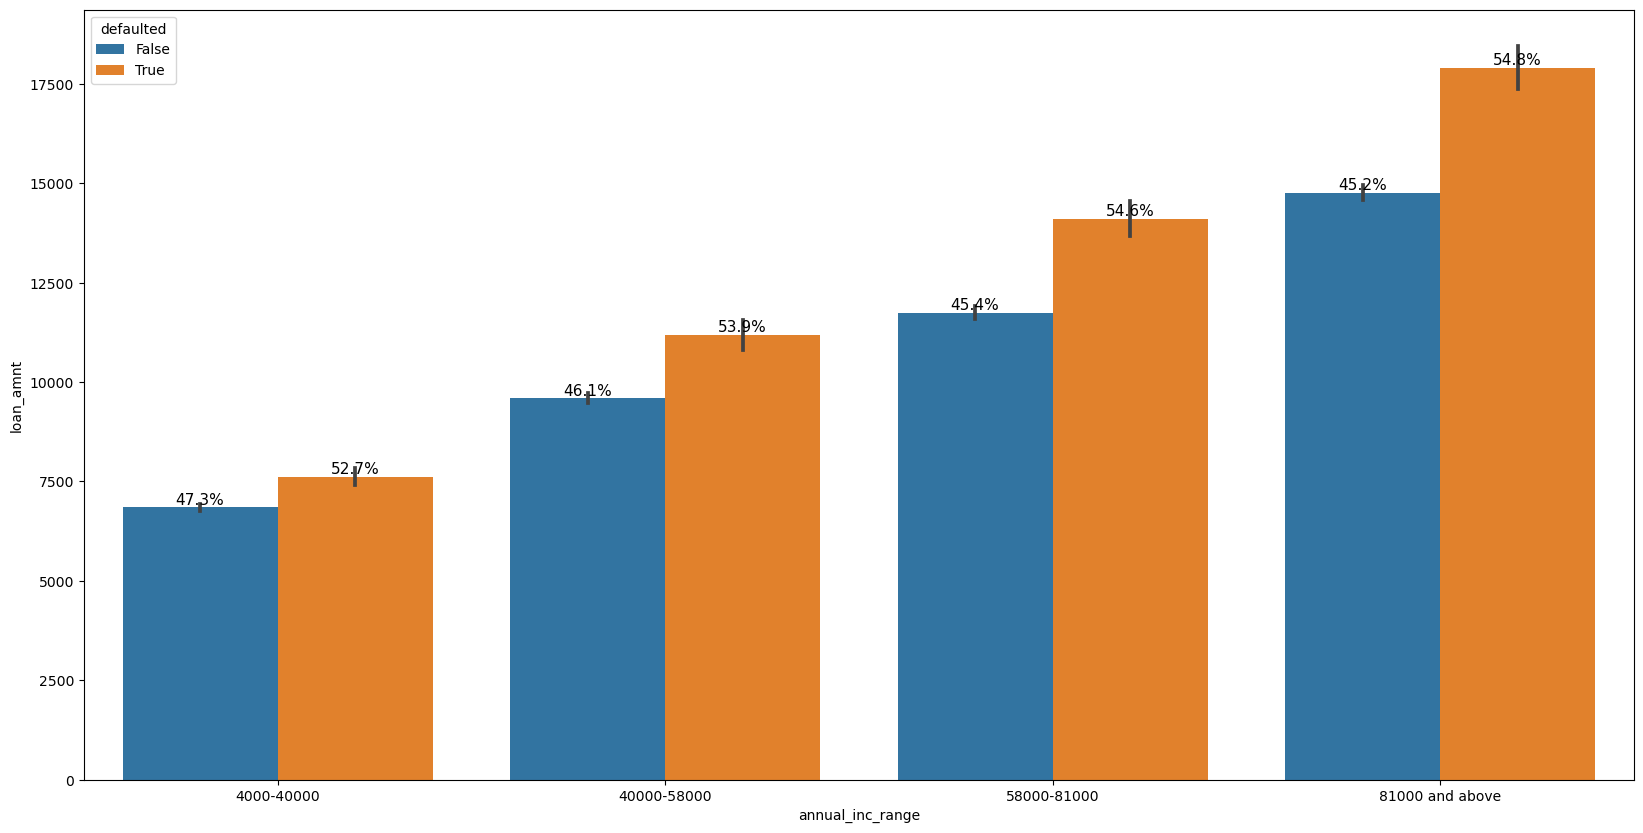

In [89]:
#Bivariate Analysis with loan_amount and annual_inc_range
fig, ax = plt.subplots(figsize=(20, 10))
ax = sb.barplot(data = df, x = 'annual_inc_range', y="loan_amnt", hue = "defaulted") 
percentage_bar(ax)

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>Here, we can clearly observe that <b>default rate</b> is increased as the loan amount & annual income increases
    <br/>Every bin in annual income has atleast 50% default rate</p>
</div>

### Interest rate and Term

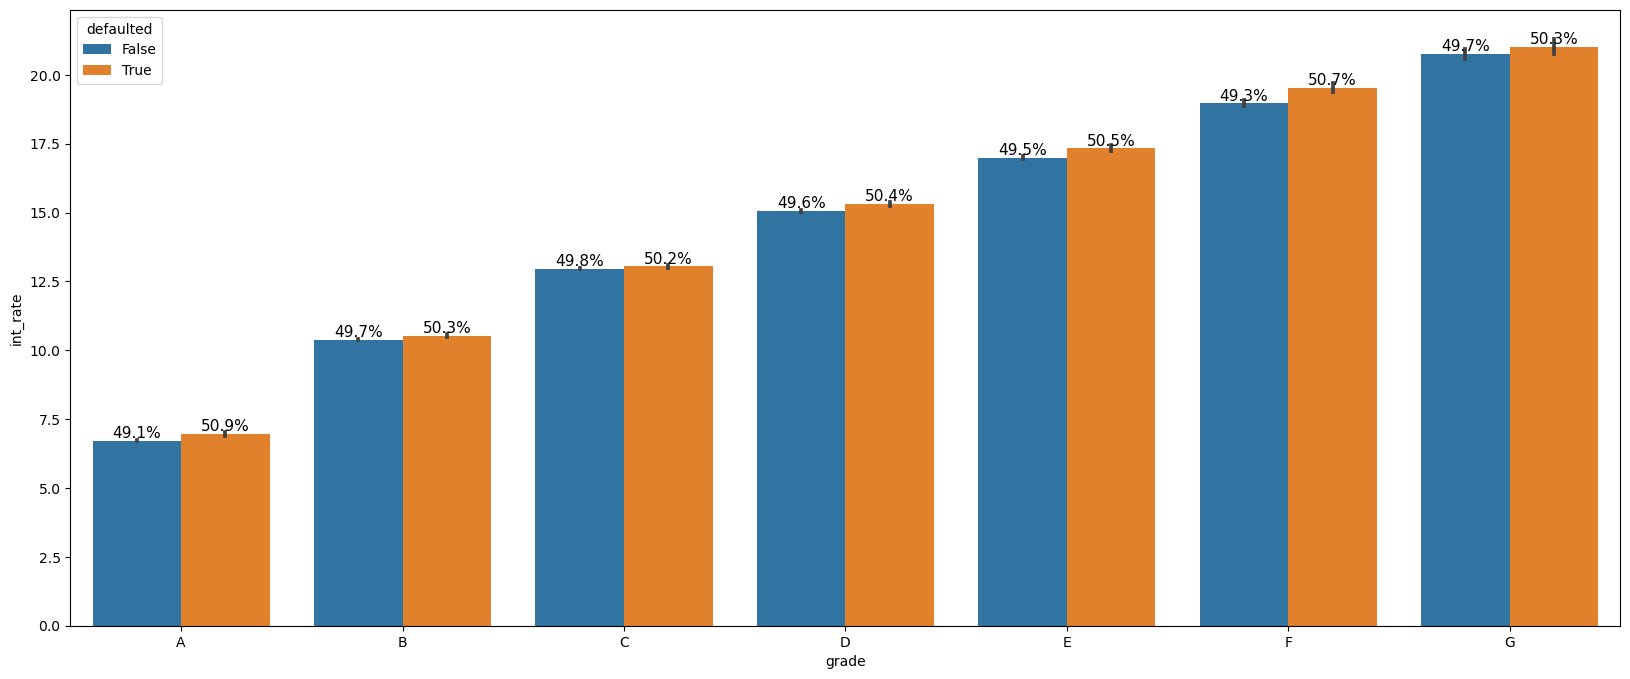

In [96]:
#Bivariate Analysis with interest rate and grade
fig, ax = plt.subplots(figsize=(20, 8))
ax = sb.barplot(data = df_grades, x = 'grade', y="int_rate", hue = "defaulted") 
percentage_bar(ax)

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>Here, we can clearly observe that <b>default rate</b> is co-related to interest rate & grade</p>
</div>

### Revolving util and Purpose

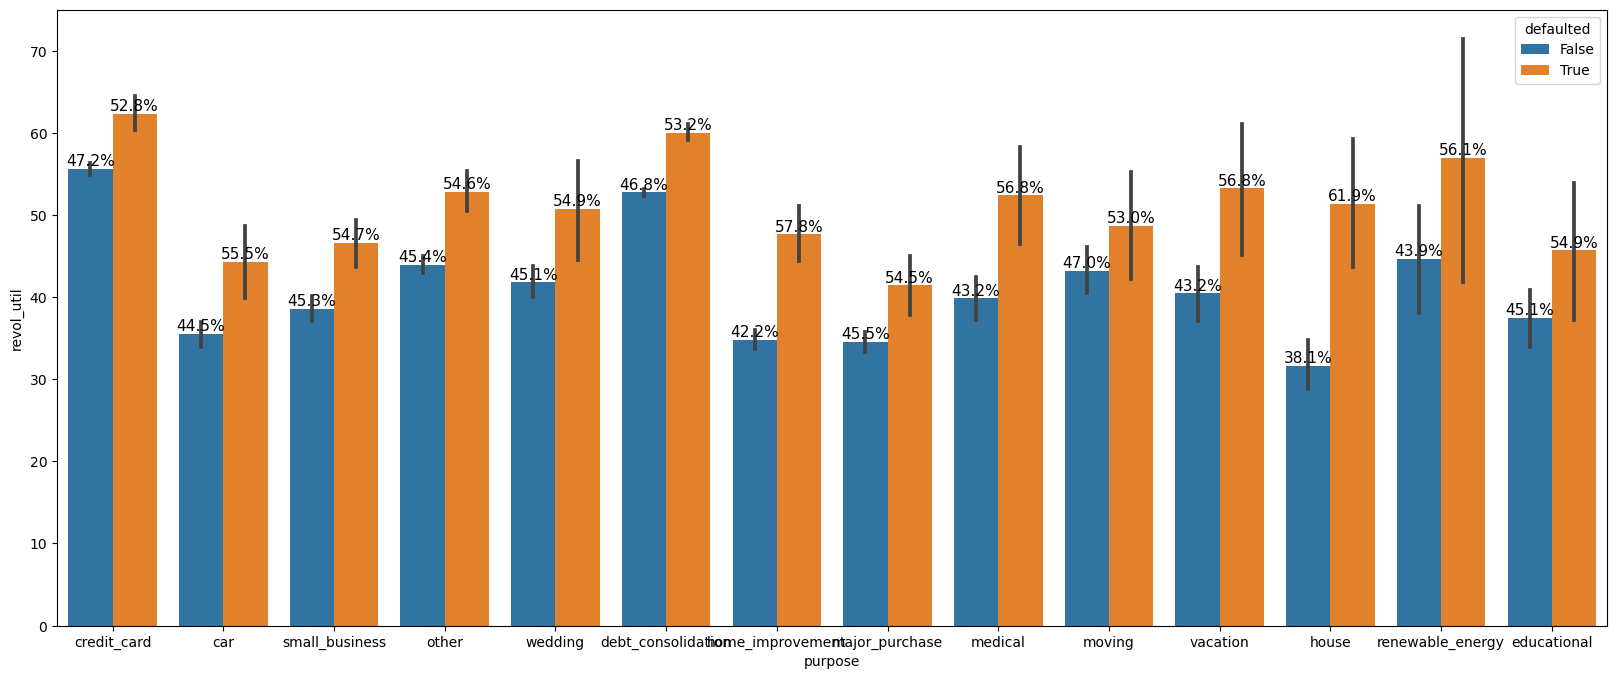

In [97]:
#Bivariate Analysis with revolving util & purpose
fig, ax = plt.subplots(figsize=(20, 8))
ax = sb.barplot(data = df, x = 'purpose', y="revol_util", hue = "defaulted") 
percentage_bar(ax)

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>Here, the default rate is more for all categories in purpose as revol util increases.</p>
</div>

### Interest rate and Debt to income rate range

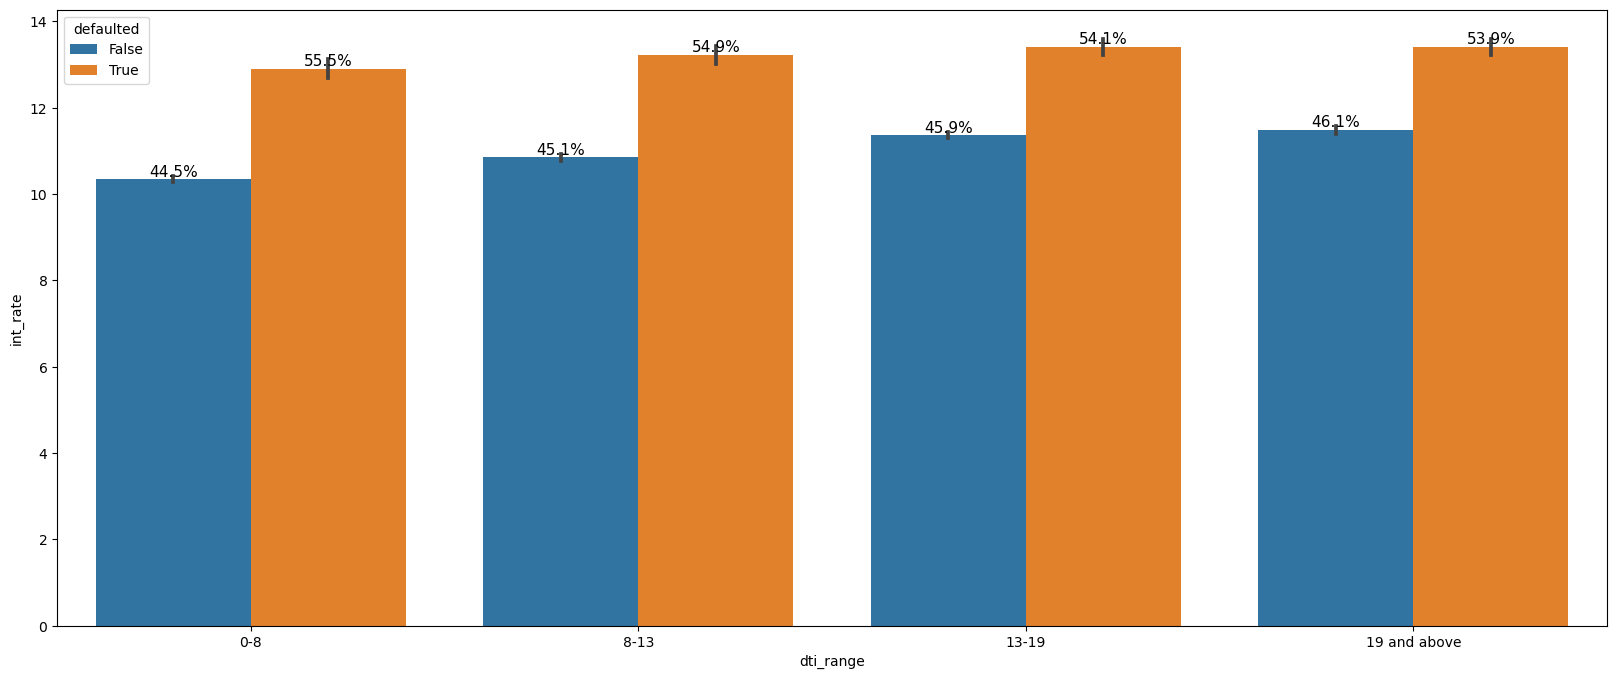

In [98]:
#Bivariate Analysis with interest rate & dti range
fig, ax = plt.subplots(figsize=(20, 8))
ax = sb.barplot(data = df, x = 'dti_range', y="int_rate", hue = "defaulted") 
percentage_bar(ax)

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>Here, the default rate is decreasing as the dti range and interest rate increases.</p>
</div>

### Loan amount and Term

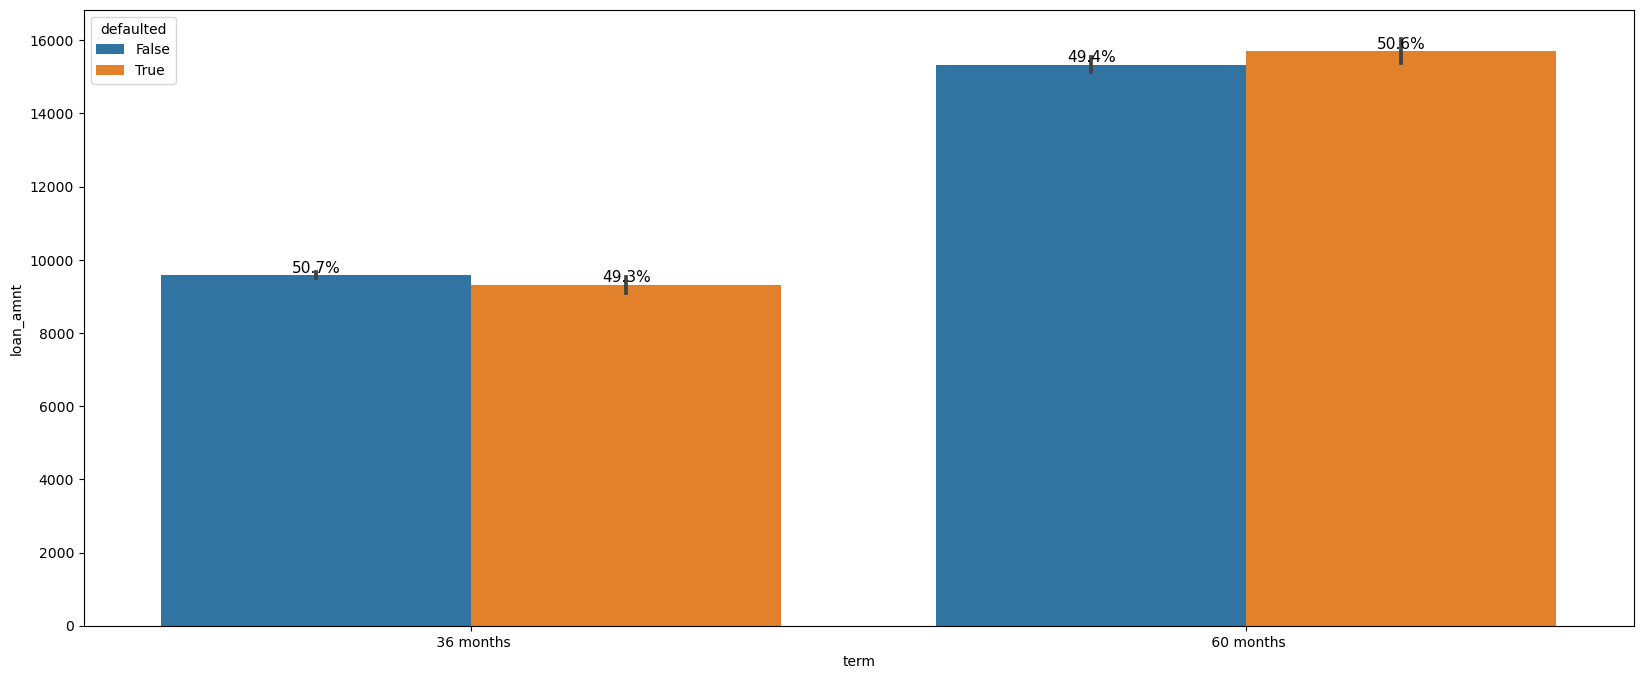

In [99]:
#Bivariate Analysis with loan amount & term
fig, ax = plt.subplots(figsize=(20, 8))
ax = sb.barplot(data = df, x = 'term', y="loan_amnt", hue = "defaulted") 
percentage_bar(ax)

<div class="observation" style='background-color:#04AF70;font-size:16px;padding:10px;color:white'>
    <p >Insights:<br/>Here, we can see that default rate increased as the loan amount and term increases
    <br/>We can also observe that defaulted < loan paid for 36 months and then for 60 months it changed to defaulted > loan paid</p>
</div>

[Back To Top🔝](#content0)
## 8. Conclusion<a name="content8"/>

<div class="observation" style='background-color:#6495ED;font-size:16px;padding:10px;color:white'>
    <p>Therefore, we can conclude from the above insights that the following variables <b>impact</b> the target variable <b>defaulted</b>
       <br/>&emsp;&emsp; > Interest Rate
       <br/>&emsp;&emsp; > Grade
       <br/>&emsp;&emsp; > Annual Income
       <br/>&emsp;&emsp; > Purpose
       <br/>&emsp;&emsp; > Term
       <br/>&emsp;&emsp; > Revolving utilization rate (revol_util)
       <br/>&emsp;&emsp; > Debt to income ratio (dti)
       <br/>&emsp;&emsp; > Loan amount
    </p>
</div>